In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


###  Defina as constantes: a e N

In [ ]:
a = 0.5
N = 4

### Solucao por Convolucao

In [ ]:
def geraSinais(N, a):
  un = np.ones(2*N)
  un_N = np.concatenate( [np.zeros(N), np.ones(N)] )
  xn = un - un_N 
  hn = np.concatenate( [np.power(a, np.arange(N)), np.zeros(N)] )
  print("N:{}, a:{}".format(N, a))
  print("Sinal x(n): {}".format(xn) )
  print("Resposta h(n): {}".format(hn) )
  return xn, hn

In [ ]:
def convolution(xn, hn):
  yn = []
  for n in range(0, 2*N):
    sum = 0
    for k in range(0, 2*N):
      m = n - k
      if (m<0):
        continue
      sum += xn[k]*hn[m]
    yn.append( sum  )
  yn = np.array(yn)
  print("Sinal y(n)=x(n)*h(n): {}".format(yn) )
  return yn

In [ ]:
xn, hn = geraSinais(N, a)
yn = convolution(xn, hn)

N:4, a:0.5
Sinal x(n): [1. 1. 1. 1. 0. 0. 0. 0.]
Resposta h(n): [1.    0.5   0.25  0.125 0.    0.    0.    0.   ]
Sinal y(n)=x(n)*h(n): [1.    1.5   1.75  1.875 0.875 0.375 0.125 0.   ]


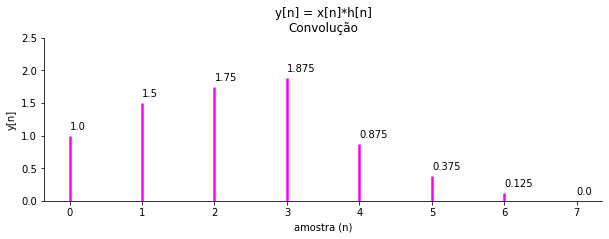

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,3))

ax.vlines(x = np.arange(0, 2*N), ymin = np.zeros(2*N), ymax = yn, colors = 'magenta', lw=2.5)

for xi in np.arange(0, 2*N):
  ax.text(x = xi, y = yn[xi]+0.1, s = str(yn[xi]) )

### personalizando grafico
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.set_xlabel('amostra (n)');
ax.set_ylabel('y[n]');
ax.set_ylim(0, 2.5);
ax.set_title("y[n] = x[n]*h[n]\nConvolução");

### Solucao Analítica

In [ ]:
### intervalo 1 - 0<= n <=N-1
print("intervalo 1:{}".format(np.arange(0, N)))
i1 = (1-np.power(a, np.arange(0, N)+1 ))/(1-a) 

### intervalo 2 - N-1< n < 2N-2
i2= []
print("intervalo 1:{}".format(np.array( range(N, 2*N-1))))
for n in range(N, 2*N-1):
  i2.append( (np.power(a, n-N+1) - np.power(a, N))/(1-a) )
i2 = np.array(i2)
yn = np.concatenate( [i1, i2, np.array([0])] )
print("Sinal y(n)=x(n)*h(n): {}".format(yn) )

intervalo 1:[0 1 2 3]
intervalo 1:[4 5 6]
Sinal y(n)=x(n)*h(n): [1.    1.5   1.75  1.875 0.875 0.375 0.125 0.   ]


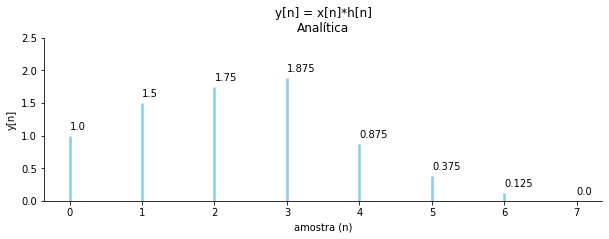

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(10,3))

ax.vlines(x = np.arange(0, 2*N), ymin = np.zeros(2*N), ymax = yn, colors = 'skyblue', lw=2.5)

for xi in np.arange(0, 2*N):
  ax.text(x = xi, y = yn[xi]+0.1, s = str(yn[xi]) )

### personalizando grafico
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.set_xlabel('amostra (n)');
ax.set_ylabel('y[n]');
ax.set_ylim(0, 2.5);
ax.set_title("y[n] = x[n]*h[n]\nAnalítica");